## Comparison between the average velocity and the velocity at a particular depth

Below is an analysis showing the difference in velocity between the average velocity, calculated as $V_{avg}=Q/A$, and the velocity at the sensor $u_{sensor}$. For the comparison, one needs to select the sensor height $z_{sensor}$. The comparison is done at first for a single flow condition. Following this, the calculation is done over a range of flow conditions.

## Initial loads 

In [1]:
%pylab inline
%config InlineBackend.figure_format='retina' # hig-res plots for a Retina display
from scipy.optimize import fsolve,newton

# Manning for a trapezoidal or rectangular channel
def manning(y, Q,b,S,n,Co,m):
    A = (b+m*y)*y
    R = A/(b+2*y*(1+m**2)**(1/2))
    return Q-(Co/n)*A*R**(2/3)*S**(1/2) 

Populating the interactive namespace from numpy and matplotlib


## Single flow condition

Input within the "user input" section can be changed to look at different flow conditions and sensor heights.

normal depth 2.154
avg velocity 2.32
ks 0.76
velocity at sensor [m/s] 1.32


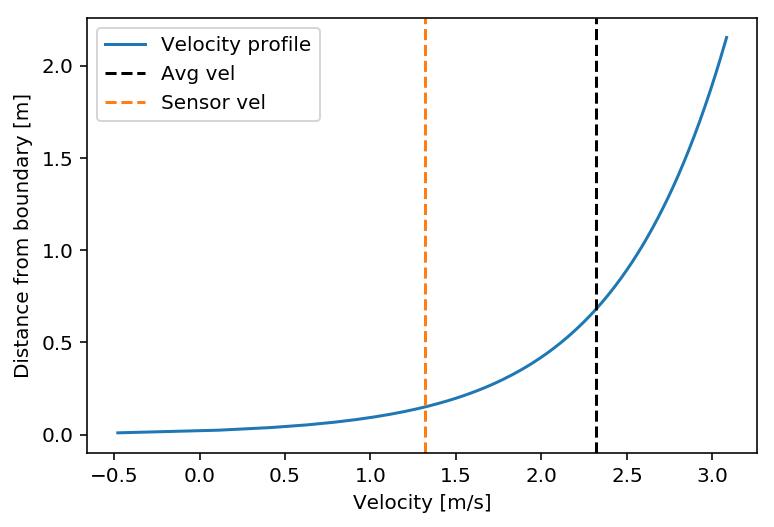

In [2]:
# user input --------------------------------------------

# flow conditions

g = 9.81
Q = 50         # in US or SI... but consistent
b = 10          # bottom channel width
n = 0.04        # roughness coeff
m = 0           # side slopes
So = 0.0050    # bed slope

# sensor location

z_sensor = 0.15 # height of sensor [m]

# calculations -----------------------------------------

# Manning calcs

if g>10:
    Co = 1.486
else:
    Co = 1

yosol = fsolve(manning,1, args=(Q, b, So, n, Co, m))
yo = yosol[0]

Ao = (b+m*yo)*yo
Ro = Ao/(b+2*yo*(1+m**2)**(1/2))
V = Q/Ao
ustar = sqrt(g*Ro*So)

print('normal depth', around(yo, decimals=3))
print('avg velocity', around(V, decimals=2))

# profile calcs

kappa = 0.41
N = 150   # number of point for the velocity profile
zp_min = 4000 # minimum z+ value for the profile
z_min = 0.01
z = linspace(z_min,yo,N)
ks = yo*e**(-(V/ustar-6)*kappa)
u = ustar*((1/kappa)*log(z/ks)+8.8)
print('ks', around(ks, decimals=2))

U_sensor = interp(z_sensor, z, u)
print('velocity at sensor [m/s]',around(U_sensor, decimals=2))

fig, ax = plt.subplots()
ax.plot(u,z, label='Velocity profile')
ax.axvline(x=V,color='k', linestyle='--', label='Avg vel')
ax.axvline(x=U_sensor,color='C1', linestyle='--', label='Sensor vel')
ax.set_xlabel('Velocity [m/s]')
ax.set_ylabel('Distance from boundary [m]')
legend(loc=2);

## Analysis for multiple flow conditions
Here the same calculations are made over a range of discharges, and the difference between $V_{avg}$ (the average velocity) and the velocity at the sensor, $u_{sensor}$ are compared. User inputs for the minimum and maximum discharge values ($Q_{min}$ and $Q_{max}$) can be changed in the "user input" section below.

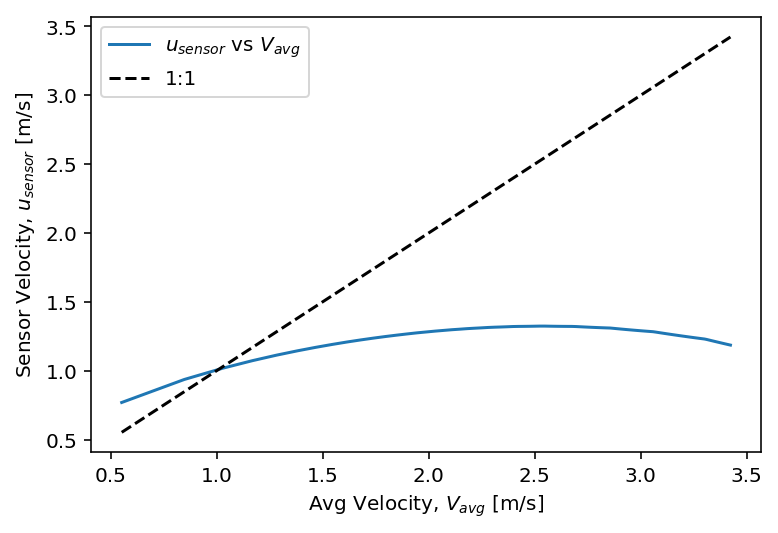

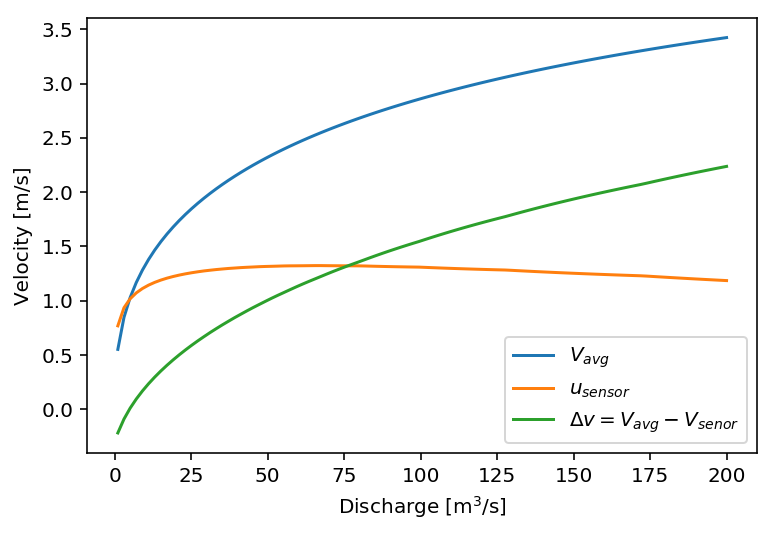

In [3]:
# User input ---------------------------------------

Qmin = 1   # min discharge in m^3/s
Qmax = 150 # max discharge in m^3/s
NQ = 100   # number of discharge points

# calculations ------------------------------------

Qrange = linspace(1,200,NQ)
Vrange = linspace(1,200,NQ)
Usenrange = linspace(1,200,NQ)

for i in range(0,NQ):

    yosol = fsolve(manning,1, args=(Qrange[i], b, So, n, Co, m))
    yo = yosol[0]

    Ao = (b+m*yo)*yo
    Ro = Ao/(b+2*yo*(1+m**2)**(1/2))
    Vrange[i] = Qrange[i]/Ao
    ustar = sqrt(g*Ro*So)
    ks = yo*e**(-(Vrange[i]/ustar-6)*kappa)
    
    z = linspace(z_min,yo,N)
    u = ustar*((1/kappa)*log(z/ks)+8.8)

    Usenrange[i] = interp(z_sensor, z, u)

Du = Vrange - Usenrange

# plot Vavg vs usensor
fig, ax = plt.subplots()
ax.plot(Vrange,Usenrange, label='$u_{sensor}$ vs $V_{avg}$')
ax.plot([min(Vrange),max(Vrange)],[min(Vrange),max(Vrange)],'k--',label='1:1')
ax.set_xlabel('Avg Velocity, $V_{avg}$ [m/s]')
ax.set_ylabel('Sensor Velocity, $u_{sensor}$ [m/s]')
legend(loc=2);

# plot velocities vs discharge
fig, ax = plt.subplots()
ax.plot(Qrange, Vrange, label='$V_{avg}$')
ax.plot(Qrange, Usenrange,label='$u_{sensor}$')
ax.plot(Qrange,Du, label='$\Delta v = V_{avg} - V_{senor}$')
ax.set_xlabel('Discharge [m$^3$/s]')
ax.set_ylabel('Velocity [m/s]')
legend(loc=4);